# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

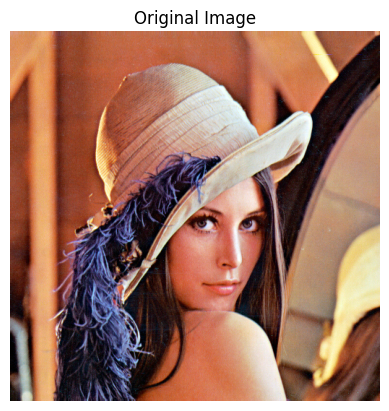

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/sample.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using OpenCV (won't work in Jupyter, for reference)
# cv2.imshow('Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Display using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Shape: (512, 512, 3)
Resized Image Shape: (100, 100, 3)


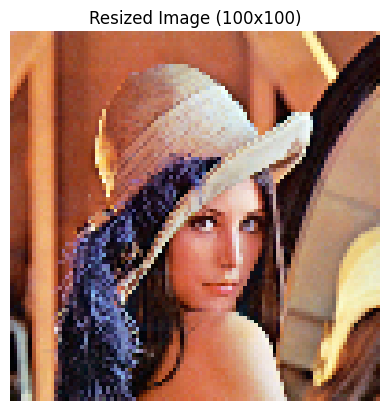

In [7]:
print(f"Original Shape: {image.shape}")
resized = cv2.resize(image, (100, 100))
print(f"Resized Image Shape: {resized.shape}")
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (100x100)")
plt.axis('off')
plt.show()

## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


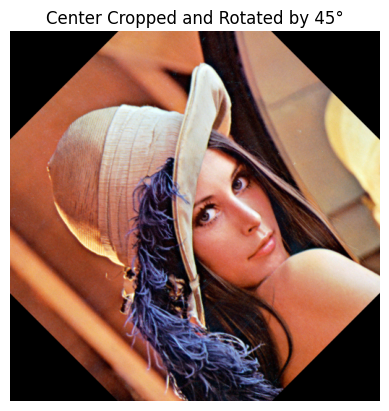

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img = cv2.imread('/content/sample.jpg')

#Crop the center square
height, width, _ = img.shape
min_dim = min(height, width)

start_x = (width - min_dim) // 2
start_y = (height - min_dim) // 2
cropped_img = img[start_y:start_y+min_dim, start_x:start_x+min_dim]

# Rotate the image by 45 degrees
center = (min_dim // 2, min_dim // 2)
rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1.0)

# Perform the rotation
rotated_img = cv2.warpAffine(cropped_img, rotation_matrix, (min_dim, min_dim))

rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)

plt.imshow(rotated_img_rgb)
plt.title('Center Cropped and Rotated by 45°')
plt.axis('off')
plt.show()

## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

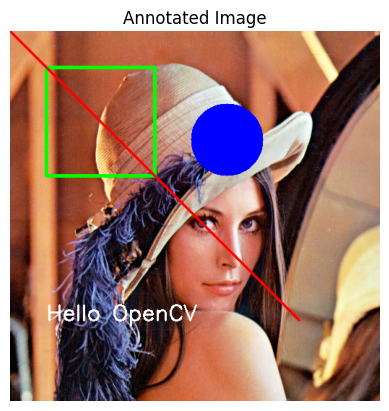

In [11]:
annotated = image.copy()
cv2.rectangle(annotated, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.circle(annotated, (300, 150), 50, (255, 0, 0), -1)
cv2.line(annotated, (0, 0), (400, 400), (0, 0, 255), 2)
cv2.putText(annotated, "Hello OpenCV", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image")
plt.axis('off')
plt.show()

## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

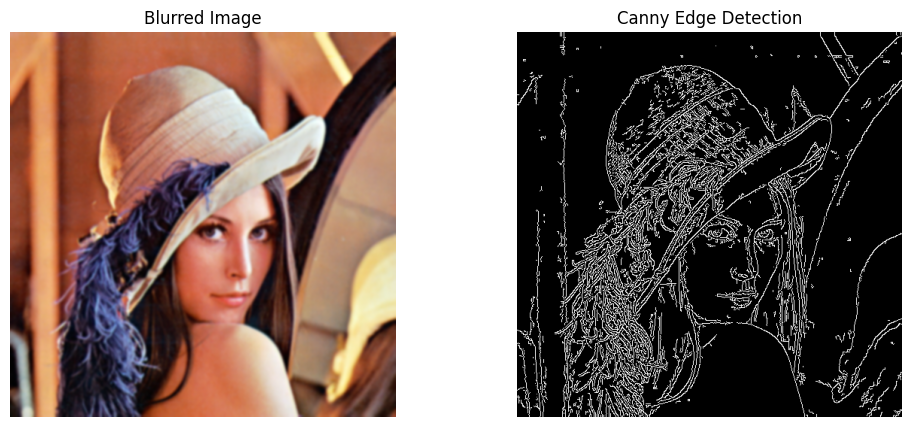

In [17]:
blurred = cv2.GaussianBlur(image, (7, 7), 0)
edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

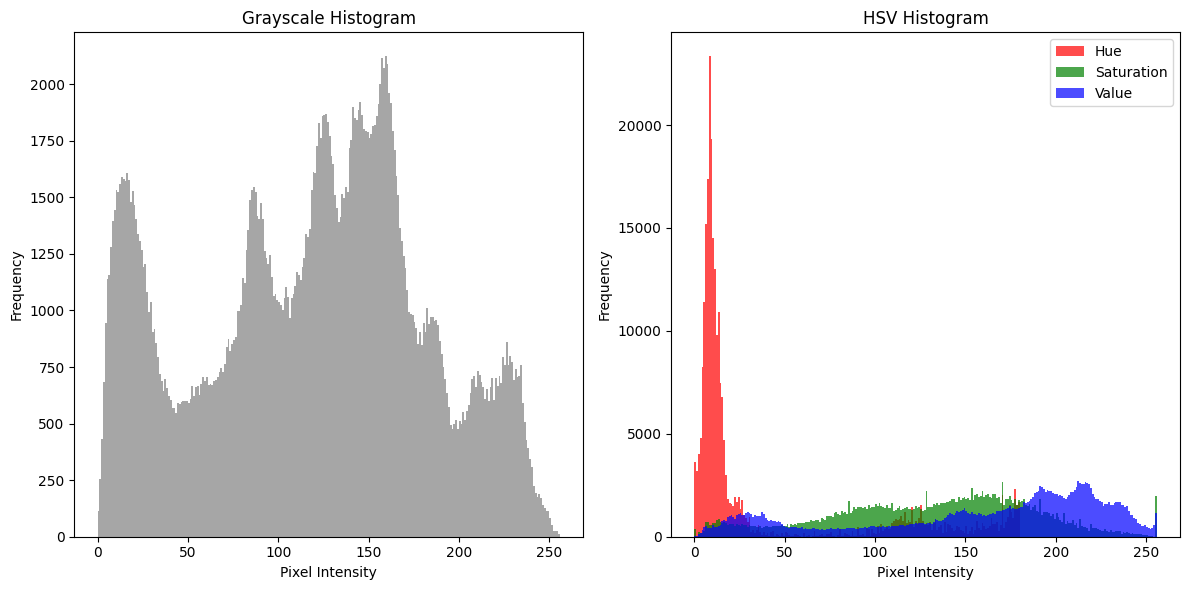

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plotting histograms of grayscale values
plt.figure(figsize=(12, 6))

# Plot grayscale histogram
plt.subplot(1, 2, 1)
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot HSV histograms (Hue, Saturation, Value)
plt.subplot(1, 2, 2)
colors = ['r', 'g', 'b']
channels = ['Hue', 'Saturation', 'Value']
for i, color in enumerate(colors):
    plt.hist(hsv_image[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7, label=channels[i])

plt.title('HSV Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
